In [112]:
import pandas as pd
import numpy as np
from pandas import plotting
import sklearn
import sklearn.model_selection as cv
import sklearn.neighbors as nb
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as  plt
from imblearn.under_sampling import RandomUnderSampler


file_path = 'Dataset/smoking.csv'
data = pd.read_csv(file_path)
data.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


# Unbalanced KNN

## First Analysis

In [113]:
smoking_dataset = pd.read_csv(filepath_or_buffer="Dataset/Normalized_Smoking.csv")

X = smoking_dataset.loc[:, ['gender', 'age', 'height', 'weight', 'waist', 'sightL', 'sightR', 'uProtein',
                             'hearL', 'hearR', 'systolicP', 'diastolicP', 'fastBSugar', 'cholesterol',
                             'triglyceride', 'hdl', 'ldl', 'hemoglobin', 'sCreatinine', 'ast', 'alt',
                             'gtp', 'caries', 'tartar']]
y = smoking_dataset.loc[:, "smoking"]
(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y, test_size = .3, random_state = 1)

# Default KNN classifier with k=5 and no weights
knc = nb.KNeighborsClassifier()
knc.fit(X_train, y_train)
y_pred = knc.predict(X_test)

#Accuracy, metrics and Confussion matrix
print("Score: ")
print(knc.score(X_test, y_test))
print()
print("Metrics:")
print(metrics.classification_report(y_test, y_pred))
print()
print("Confussion matrix:")
print(sklearn.metrics.confusion_matrix(y_test, y_pred))

Score: 
0.7351192263799627

Metrics:
              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79     10585
         1.0       0.64      0.64      0.64      6064

    accuracy                           0.74     16649
   macro avg       0.71      0.71      0.71     16649
weighted avg       0.74      0.74      0.74     16649


Confussion matrix:
[[8361 2224]
 [2186 3878]]


## Trying Different Parameters

In [114]:
# Results for different K values and no weights
cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=1), X=X_train, y=y_train,  cv=10)
print("K = 1: ", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=5), X=X_train, y=y_train,  cv=10)
print("K = 5: ",  np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=10), X=X_train, y=y_train,  cv=10)
print("K = 10: ",  np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=15), X=X_train, y=y_train,  cv=10)
print("K = 15: ",  np.mean(cv_scores))

K = 1:  0.7586564488572728
K = 5:  0.7251129008955991
K = 10:  0.7224868483313386
K = 15:  0.7275843476255422


In [96]:
# Results for different K values and distance weights
cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=1,weights='distance'), X=X_train, y=y_train,  cv=10)
print("K = 1: ", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=5,weights='distance'), X=X_train, y=y_train,  cv=10)
print("K = 5: ",  np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=10,weights='distance'), X=X_train, y=y_train,  cv=10)
print("K = 10: ",  np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=15, weights='distance'), X=X_train, y=y_train,  cv=10)
print("K = 15: ",  np.mean(cv_scores))

K = 1:  0.7586564488572728
K = 5:  0.776805387114347
K = 10:  0.7833955494408634
K = 15:  0.7878235164692426


### Plotting different K values

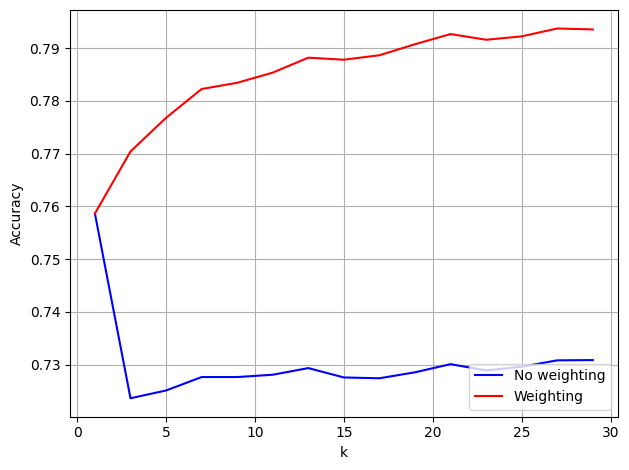

In [97]:
lr = []
for ki in range(1,30,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki), X=X_train, y=y_train, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,30,2),lr,'b',label='No weighting')

lr = []
for ki in range(1,30,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki,weights='distance'), X=X_train, y=y_train, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,30,2),lr,'r',label='Weighting')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()

plt.show()

## Finding the best K

In [98]:
# We define the parameters to test, for K = to the range of odds from 1 to 30, and both using and not using weights
params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
knc = nb.KNeighborsClassifier()

# We try all possible combinations with a GridSearch
clf = GridSearchCV(knc, param_grid=params,cv=10,n_jobs=-1)
clf.fit(X_train, y_train)

# We print the best parameters
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

Best Params= {'n_neighbors': 27, 'weights': 'distance'} Accuracy= 0.7937447363502976


Accuracy:  0.7996276052615773
Variance:  3.381782897490576e-05
prediction: [array([1., 0., 0., ..., 0., 1., 1.])]
0.7996276052615773
[[8739 1846]
 [1490 4574]]

Accuracy: 0.7996276052615773

              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84     10585
         1.0       0.71      0.75      0.73      6064

    accuracy                           0.80     16649
   macro avg       0.78      0.79      0.79     16649
weighted avg       0.80      0.80      0.80     16649



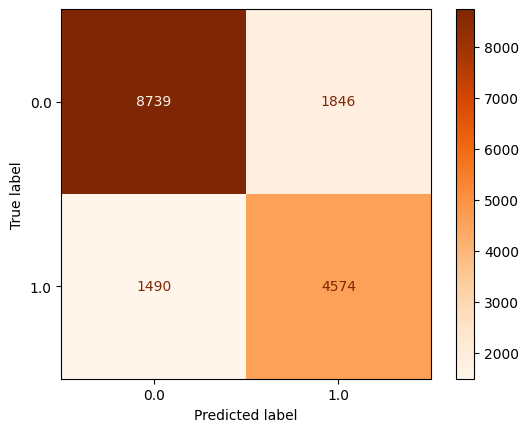

In [99]:
# We train the model with the best values obtained on the previous step
from sklearn.metrics import classification_report, accuracy_score

knc = nb.KNeighborsClassifier(n_neighbors=27,weights='distance')
knc.fit(X_train, y_train)
pred=knc.predict(X_test)

# cross validation to check the variance in 10 iterations
cross_score = cross_val_score(knc, X_train, y_train, cv= 10)

# We again print the Accuracy and confussion matrix for the best model
print("Accuracy: ", sklearn.metrics.accuracy_score(y_test, pred))
print("Variance: ", np.var(cross_score))

unique_labels = np.unique(y_test)
ConfusionMatrixDisplay.from_estimator(knc, X_test, y_test, display_labels=unique_labels, ax=plt.subplot(), cmap='Oranges')

print(f"prediction: {[pred]}")
print(clf.score(X_test, y_test))
print(confusion_matrix(y_test, pred))
print(f"\nAccuracy: {accuracy_score(y_test, pred)}\n")
print(classification_report(y_test, pred))


In [100]:
# Statistical info
from statsmodels.stats.proportion import proportion_confint

epsilon = sklearn.metrics.accuracy_score(y_test, pred)
print("Can approximate by Normal Distribution?: ",X_test.shape[0]*epsilon*(1-epsilon)>5)
print("Interval 95% confidence:", "{0:.3f}".format(epsilon), "+/-", "{0:.3f}".format(1.96*np.sqrt(epsilon*(1-epsilon)/X_test.shape[0])))
proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='normal')

Can approximate by Normal Distribution?:  True
Interval 95% confidence: 0.800 +/- 0.006


(0.7935474194996551, 0.8057077910234994)

## Data amount influence

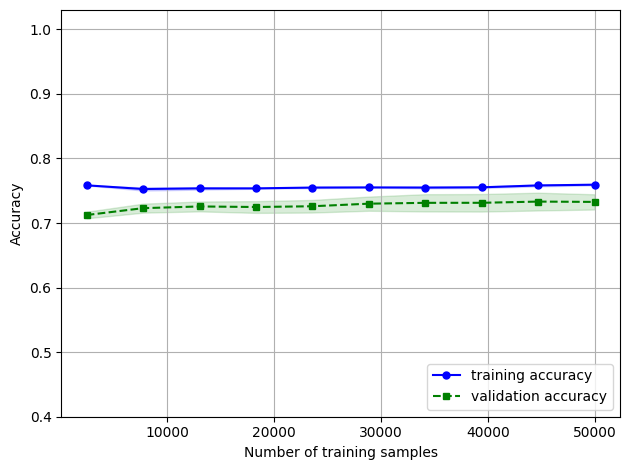

In [117]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=nb.KNeighborsClassifier(n_neighbors=27),
                               X=X,
                               y=y,
                               train_sizes=np.linspace(0.05, 1.0, 10),
                               cv=10,
                               n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid(True)
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.4, 1.03])
plt.tight_layout()
plt.savefig('learning_curve.png', dpi=600)
plt.show()

## Irrelevant features

In [101]:
# We calculate the correlation matrix to determine which values are the least correlated
corr_mat = smoking_dataset.corr()
corr_mat['smoking']

gender          0.510654
age            -0.163116
height          0.397369
weight          0.303952
waist           0.227151
sightL          0.092408
sightR          0.100355
hearL          -0.023600
hearR          -0.019672
systolicP       0.073813
diastolicP      0.108804
fastBSugar      0.100009
cholesterol    -0.028605
triglyceride    0.252098
hdl            -0.178997
ldl            -0.055586
hemoglobin      0.401534
uProtein        0.013935
sCreatinine     0.219566
ast             0.059287
alt             0.097504
gtp             0.236544
caries          0.104092
tartar          0.098828
smoking         1.000000
Name: smoking, dtype: float64

In [102]:
# We drop the variables with a correlation closest to 0, and recalculate the best value for K
df = smoking_dataset.drop(["uProtein", "hearR"], axis=1)

X2 = df.loc[:, ['gender', 'age', 'height', 'weight', 'waist', 'sightL', 'sightR',
                'hearL', 'systolicP', 'diastolicP', 'fastBSugar', 'cholesterol',
                'triglyceride', 'hdl', 'ldl', 'hemoglobin', 'sCreatinine', 'ast', 'alt',
                'gtp', 'caries', 'tartar']]
y2 = df.loc[:, "smoking"]

(X_train, X_test,  y_train, y_test) = cv.train_test_split(X2, y2, test_size=.3, random_state=1)

params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
knc = nb.KNeighborsClassifier()

clf = GridSearchCV(knc, param_grid=params,cv=10,n_jobs=-1)
clf.fit(X_train, y_train)

# We print the best parameters
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

knc = nb.KNeighborsClassifier(n_neighbors=23,weights='distance')
knc.fit(X_train, y_train)
pred=knc.predict(X_test)

# We again print the Accuracy and confussion matrix for the best model
print("Accuracy: ", sklearn.metrics.accuracy_score(y_test, pred))

Best Params= {'n_neighbors': 23, 'weights': 'distance'} Accuracy= 0.7947743837702642
Accuracy:  0.7968046128896631


## Result print (without irrelevant features)

In [103]:
from sklearn.metrics import classification_report, accuracy_score

print(f"prediction: {[pred]}")
print(clf.score(X_test, y_test))
print(confusion_matrix(y_test, pred))
print(f"\nAccuracy: {accuracy_score(y_test, pred)}\n")
print(classification_report(y_test, pred))

prediction: [array([1., 0., 0., ..., 0., 1., 1.])]
0.7968046128896631
[[8718 1867]
 [1516 4548]]

Accuracy: 0.7968046128896631

              precision    recall  f1-score   support

         0.0       0.85      0.82      0.84     10585
         1.0       0.71      0.75      0.73      6064

    accuracy                           0.80     16649
   macro avg       0.78      0.79      0.78     16649
weighted avg       0.80      0.80      0.80     16649



# BALANCED KNN (Undersampling)

## Test with undersampling

In [104]:
smoking_dataset = pd.read_csv(filepath_or_buffer="Dataset/Smoking_preprocessed.csv")

X = smoking_dataset.iloc[:, :-1]
y = smoking_dataset.loc[:, "smoking"]
(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y, test_size = .3, random_state = 1)

In [105]:
undersampler = RandomUnderSampler(sampling_strategy="majority", random_state=1)
X_under, y_under = undersampler.fit_resample(X_train, y_train)

print(y_train.value_counts())
print(y_under.value_counts())

smoking
0    24521
1    14324
Name: count, dtype: int64
smoking
0    14324
1    14324
Name: count, dtype: int64


## First Analysis

In [106]:
# Default KNN classifier with k=5 and no weights
knc = nb.KNeighborsClassifier()
knc.fit(X_under, y_under)
y_pred = knc.predict(X_test)

#Accuracy, metrics and Confussion matrix
print("Score: ")
print(knc.score(X_test, y_test))
print()
print("Metrics:")
print(metrics.classification_report(y_test, y_pred))
print()
print("Confussion matrix:")
print(sklearn.metrics.confusion_matrix(y_test, y_pred))

Score: 
0.6916331311189862

Metrics:
              precision    recall  f1-score   support

           0       0.82      0.66      0.73     10585
           1       0.56      0.74      0.64      6064

    accuracy                           0.69     16649
   macro avg       0.69      0.70      0.68     16649
weighted avg       0.72      0.69      0.70     16649


Confussion matrix:
[[7026 3559]
 [1575 4489]]


In [107]:
# Results for different K values and no weights
cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=1), X=X_under, y=y_under,  cv=10)
print("K = 1: ", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=5), X=X_under, y=y_under,  cv=10)
print("K = 5: ",  np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=10), X=X_under, y=y_under,  cv=10)
print("K = 10: ",  np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=15), X=X_under, y=y_under,  cv=10)
print("K = 15: ",  np.mean(cv_scores))

K = 1:  0.7091245356693674
K = 5:  0.6941496168358244
K = 10:  0.6959648814920978
K = 15:  0.7084958856162313


In [108]:
# Results for different K values and distance weights
cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=1,weights='distance'), X=X_under, y=y_under,  cv=10)
print("K = 1: ", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=5,weights='distance'), X=X_under, y=y_under,  cv=10)
print("K = 5: ",  np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=10,weights='distance'), X=X_under, y=y_under,  cv=10)
print("K = 10: ",  np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=15, weights='distance'), X=X_under, y=y_under,  cv=10)
print("K = 15: ",  np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=27, weights='distance'), X=X_under, y=y_under,  cv=10)
print("K = 27: ",  np.mean(cv_scores))

K = 1:  0.7091245356693674
K = 5:  0.7377476917527079
K = 10:  0.7502094728323925
K = 15:  0.7562830150048261
K = 27:  0.7605416825099691


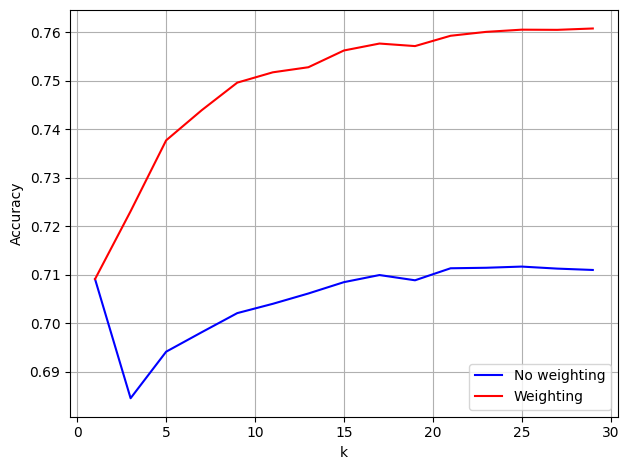

In [109]:
lr = []
for ki in range(1,30,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki), X=X_under, y=y_under, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,30,2),lr,'b',label='No weighting')

lr = []
for ki in range(1,30,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki,weights='distance'), X=X_under, y=y_under, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,30,2),lr,'r',label='Weighting')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()

plt.show()

## Finding the best K

In [110]:
# We define the parameters to test, for K = to the range of odds from 1 to 30, and both using and not using weights
params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
knc = nb.KNeighborsClassifier()

# We try all possible combinations with a GridSearch
clf_us = GridSearchCV(knc, param_grid=params,cv=10,n_jobs=-1)
clf_us.fit(X_under, y_under)

# We print the best parameters
print("Best Params=",clf_us.best_params_, "Accuracy=", clf_us.best_score_)

Best Params= {'n_neighbors': 29, 'weights': 'distance'} Accuracy= 0.7608208536858834


Accuracy:  0.7968046128896631
Variance:  3.7510844703236664e-05
prediction: [array([1, 0, 0, ..., 1, 1, 1], dtype=int64)]
0.7480929785572707
[[7351 3234]
 [ 944 5120]]

Accuracy: 0.7490539972370713

              precision    recall  f1-score   support

           0       0.89      0.69      0.78     10585
           1       0.61      0.84      0.71      6064

    accuracy                           0.75     16649
   macro avg       0.75      0.77      0.74     16649
weighted avg       0.79      0.75      0.75     16649



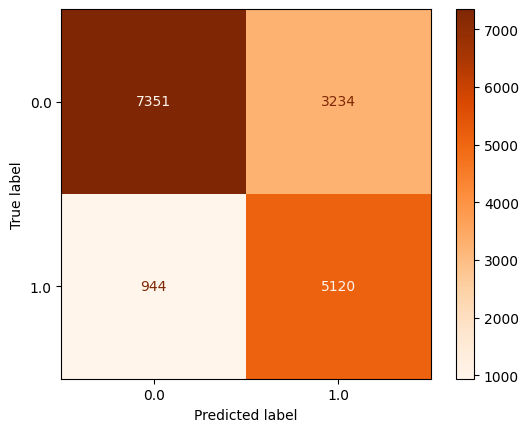

In [111]:
# We train the model with the best values obtained on the previous step
knc = nb.KNeighborsClassifier(n_neighbors=27,weights='distance')
knc.fit(X_under, y_under)
pred_us=knc.predict(X_test)

# cross validation to check the variance in 10 iterations
cross_score = cross_val_score(knc, X_under, y_under, cv= 10)

# We again print the Accuracy and confussion matrix for the best model
print("Accuracy: ", sklearn.metrics.accuracy_score(y_test, pred))
print("Variance: ", np.var(cross_score))

print(f"prediction: {[pred_us]}")
print(clf_us.score(X_test, y_test))
print(confusion_matrix(y_test, pred_us))
print(f"\nAccuracy: {accuracy_score(y_test, pred_us)}\n")
print(classification_report(y_test, pred_us))

knc.fit(X_under, y_under)
ConfusionMatrixDisplay.from_estimator(knc, X_test, y_test, display_labels=unique_labels, ax=plt.subplot(), cmap='Oranges')